<br>
<p style="font-size: 45px;
          text-align:center;
          font-family: 'Times New Roman';
          font-variant: small-caps;
          font-weight: bold;
          line-height: 50px;"> Laboratorio II Procesamiento de señales</p>
          
<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Procesamiento de Señales Biomédicas</p>
<br>
<h1>Descripción del dataset:</h1>



<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Para el desarrollo de este laboratorio se hará uso del dataset "Pulse Transit Time PPG Dataset" en el cuál se presentan diferentes señales biomédicas registradas para diferentes pacientas realizando diferentes activadades. se cuenta con las siguientes señales:
</div>
<br>
<div style="text-align: justify;width:60%;margin: 0 auto"> 
<ul>
        <li> ecg: 3-lead ECG captured at 500Hz
        <li> peaks: CSV ONLY, annotated in WFDB. The annotated ECG R peak (1 = peak, 0 = no peak)
        <li> pleth_1: MAX30101 red wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_2: MAX30101 infrared wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_3: MAX30101 green wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_4: MAX30101 red wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_5: MAX30101 infrared wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_6: MAX30101 green wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> lc_1: TAL221 load cell proximal phalanx (first segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> lc_2: TAL221 load cell (base segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> temp_1: distal phalanx (first segment) PPG sensor temperature (°C, 10Hz)
        <li> temp_2: proximal phalanx (base segment) PPG sensor temperature in (°C, 10Hz)
        <li> temp_3: InvenSenseMPU-9250 IMU temperature (°C, 500Hz)
        <li> a_x: InvenSenseMPU-9250 IMU acceleration in x-direction (g, 500Hz)
        <li> a_y: InvenSenseMPU-9250 IMU acceleration in y-direction (g, 500Hz)
        <li> a_z: InvenSenseMPU-9250 IMU acceleration in z-direction (g, 500Hz)
        <li> g_x: InvenSenseMPU-9250 IMU angular velocity around x-axis (°/s, 500Hz)
        <li> g_y: InvenSenseMPU-9250 IMU angular velocity around y-axis (°/s, 500Hz)
        <li> g_z: InvenSenseMPU-9250 IMU angular velocity around z-axis (°/s, 500Hz)

</ul>
</div>

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Por ejemplo para el sujeto de prueba s10 se presenta la lectura de los datos registrados en la actividad de correr:
</div>
<br>


In [41]:
from pathlib import Path
import pandas as pd 
from utils import get_data,display_signal,plot_signal
df=get_data(subject="s10",activity="run")

Se agrega una función interactiva para realizar la exploración de datos, mediante un widget en el jupyter notebook.

In [42]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,3)

def plot_signal(x,y):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.

    ax.plot(x,y)  # Plot some data on the axes.

    
    plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.3)
    plt.grid(visible=True, which='minor', color='k', linestyle='-',alpha=0.1)
    plt.minorticks_on()


def display_signal(t_inicial=300,signal="ecg"):
    N=2000
    Ts=0.002
    n_ini=int(t_inicial/Ts)
    t=np.arange(0,N+1)*Ts+t_inicial
    plot_signal(t,df.loc[n_ini:n_ini+N,signal])
    plt.title(signal)
    plt.xlim([0+t_inicial,N*Ts+t_inicial])
    plt.xlabel("time[sec]")
    # return x
interact(display_signal, t_inicial=widgets.IntSlider(min=0,max=400,step=1,value=300),signal=df.columns[1:]);

interactive(children=(IntSlider(value=300, description='t_inicial', max=400), Dropdown(description='signal', o…

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Adicionalmente, para validar la frecuencia de muestreo, y por tanto el período de muestreo de la señal, se propone la siguiente función. En donde se encuentra que el período es casi uniforme, dado que en algunos momentos se perdieron datos generando una distancia entre muestras de 0.002001 [sec]. Sin embargo, la gran mayoría de los datos si están uniformemente espaciados. Para simplificar los análisis se asumirá que toda las señales han sido perfectamente muestreadas.
</div>
<br>

In [36]:
def get_sample_period_and_freq(df):
    """ Function that calculates the mean max min sample period of the signal"""
    
    Ts_mean=pd.to_datetime(df["time"]).diff().shift(-1).mean().total_seconds()
    Ts_max=pd.to_datetime(df["time"]).diff().shift(-1).max().total_seconds()
    Ts_min=pd.to_datetime(df["time"]).diff().shift(-1).min().total_seconds()
    print(f"Ts_mean= {Ts_mean},Ts_max= {Ts_max},Ts_min= {Ts_min}")
    Fs=1/Ts_mean
    return Fs,Ts_mean
Fs, Ts = get_sample_period_and_freq(df)
print(f"Signal with sample period of {Ts} [sec] and sample frequency of {Fs}[Hz]")

Ts_mean= 0.002,Ts_max= 0.002001,Ts_min= 0.002
Signal with sample period of 0.002 [sec] and sample frequency of 500.0[Hz]


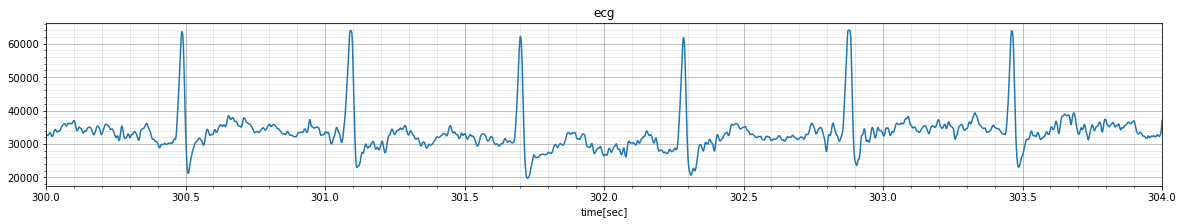

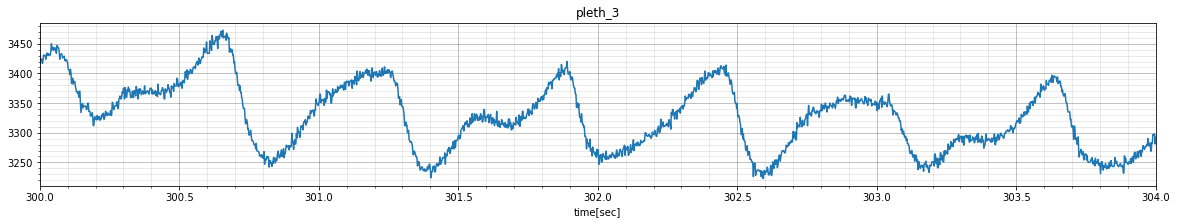

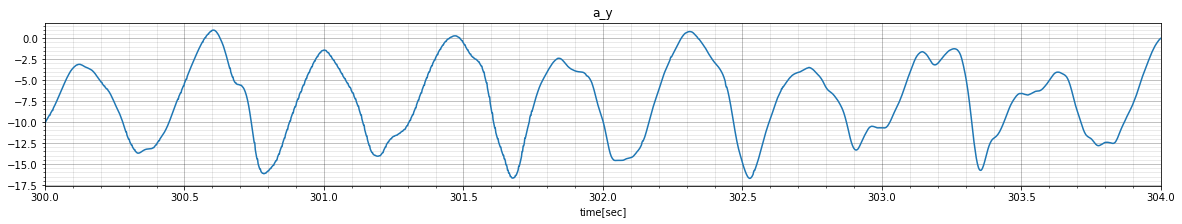

In [37]:
display_signal(t_inicial=300,signal="ecg")
display_signal(t_inicial=300,signal="pleth_3")
display_signal(t_inicial=300,signal="a_y")

<p style="font-size: 30px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Caso de ejemplo considerando toda la longitud de la señal</p>
<br>

    Se procede a calcular la autocorrelación para toda la señal

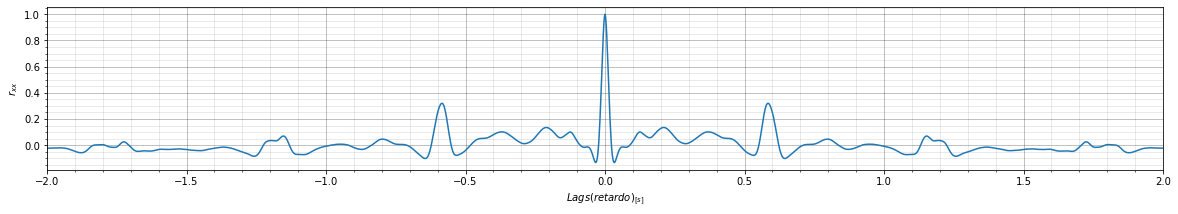

In [38]:
def get_autocorr(x):
    x=x-np.mean(x)

    y = np.correlate(x, x, 'full')
    y = y/np.max(y)
    return y

x=df.loc[:,"ecg"].to_numpy()
rxx=get_autocorr(x)
lag_samples=(np.arange(len(rxx)) - (len(rxx)-1)/2 ) # Desplazamiento para centrar el retraso 0
lag_seconds=lag_samples*0.002
plot_signal(x=lag_seconds,y=rxx)
plt.xlim([-2,2])
plt.ylabel("$r_{xx}$")
plt.xlabel("$Lags (retardo)_{[s]}$")
plt.plot();

Una vez se tiene la señal de autocorrelación, se procede a automatizar el proceso de encontrar los picos máximos de interés. Los cuales se sabe que están en $t=\pm0.584seg$

In [39]:
from scipy.signal import find_peaks
def find_lag_sample_peaks_sorted_by_rxx(rxx):
    
    lag_sample_peaks, _  = find_peaks(rxx)

    rxx_height_map = {l_n:y for l_n,y in zip(lag_sample_peaks,rxx[lag_sample_peaks])}

    lag_sample_peaks_sorted_by_rxx=sorted(lag_sample_peaks,key=lambda x: rxx_height_map[x], reverse=True)

    return lag_sample_peaks_sorted_by_rxx

lag_sample_peaks_sorted_by_rxx=find_lag_sample_peaks_sorted_by_rxx(rxx)

print(f"Las muestras del retraso donde se presentan los 3 picos más altos son\n\
        {lag_sample_peaks_sorted_by_rxx[:3]}-> [sample]\n\
        {lag_seconds[lag_sample_peaks_sorted_by_rxx[:3]]}->[seconds]\n\
        {rxx[lag_sample_peaks_sorted_by_rxx[:3]]}->[rxx value]\n ")

Las muestras del retraso donde se presentan los 3 picos más altos son
        [242814, 242522, 243106]-> [sample]
        [ 0.    -0.584  0.584]->[seconds]
        [1.         0.31999632 0.31999632]->[rxx value]
 


    Los resultados obtenidos se grafican en el diagrama de autocorrelación

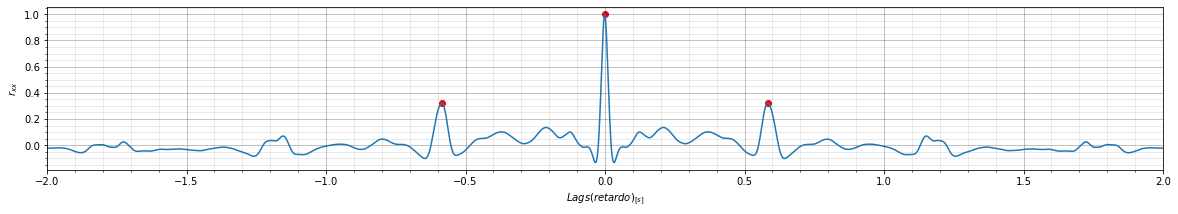

In [43]:
lag_samples=(np.arange(len(rxx))-len(rxx)/2)
lag_seconds=lag_samples*0.002
plot_signal(x=lag_seconds,y=rxx)
plt.xlim([-2,2])
plt.scatter(
    x=lag_seconds[lag_sample_peaks_sorted_by_rxx[:3]],
    y=rxx[lag_sample_peaks_sorted_by_rxx[:3]],
    c="r"
)
plt.ylabel("$r_{xx}$")
plt.xlabel("$Lags (retardo)_{[s]}$")
plt.plot();

<p style="font-size: 30px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Caso con estimación en "Tiempo Real" </p>
<br>

<h2>A) Selección del tamaño de la ventana de tiempo </h2>
<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
    Dado que se está trabajando con una señal que proviene de un electrocardiograma, se sabe que la frecuencia máxima de una persona saludable está dada por 220[ppm]-(edad_de_la_persona), en este caso de los datos obtenidos la persona más joven del experimento tiene 20 años de edad, por consiguiente se considerará una frecuencia máxima de 200ppm, esto siginifica que en el peor escenario (para personas saludables) se espera tener un periodo mínimo de la señal de:
</div>
<br>

$$
  T_{s min} = \frac{60}{200 [ppm]}= 0.3 [seconds] 
$$
<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
    Ahora bien para la frecuencia cardiaca mínima de las personas será del 30% del valor saludable que es de 60ppm, 
    es decir, la mínima frecuencia cardiaca esperable será de 20ppm, por ende el valor máximo del periodo de la señal
    esperado será de:
</div>
<br>
$$
  T_{s max} = \frac{60}{20 [ppm]}= 3 [seconds] 
$$



In [14]:
def get_Ts_from_ppm(ppm):
    return 60/ppm
get_Ts_from_ppm(ppm=200),get_Ts_from_ppm(ppm=20)

(0.3, 3.0)

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
    Se puede seleccionar un valor de n veces el periodo máximo esperable de la señal. El valor médico recomendable es tomar la medida durante 15 [sec] para tener un valor confiable de la señal, con lo cual se garantiza que en el peor caso se tienen 5 oscilaciones de la señal ECG para realizar la estimación de frecuencia cardiaca. Dado que el periodo de muestreo de la señal es de 0.002 [sec] (Fs = 500 [Hz]) se sabe que 15 segundos de la señal corresponde a un total de 7500 muestras. 
    </div>
<br>

<h2>B) Selección del solapamiento de la ventana de tiempo </h2>


    Se selecciona un solapamiento de 1 oscilación de la señal en el peor escenario posible, es decir, de 3 [sec].

<h2>C) Cálculo de la autocorrelación </h2>
<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
    Se procede a calcular la autocorrelación con la señal completa. Inicialmente se elimina el valor promedio de la señal, y se normaliza por el máximo valor alcanzado por la señal.
    <br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 

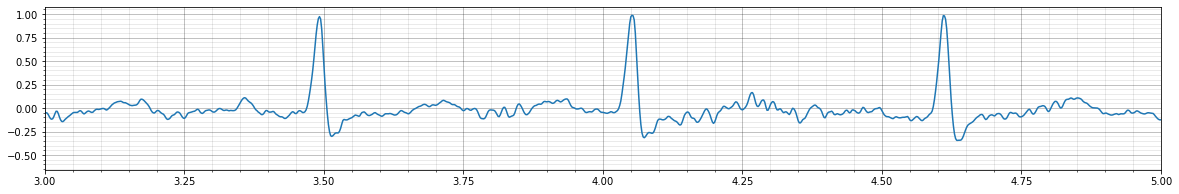

In [47]:
n=np.arange(len(x))
x=(x-np.mean(x))
x=x/np.max(x)
plot_signal(np.arange(len(x))*Ts,x)
plt.xlim([3,5]);

Posteriormente se calcula la correlación.

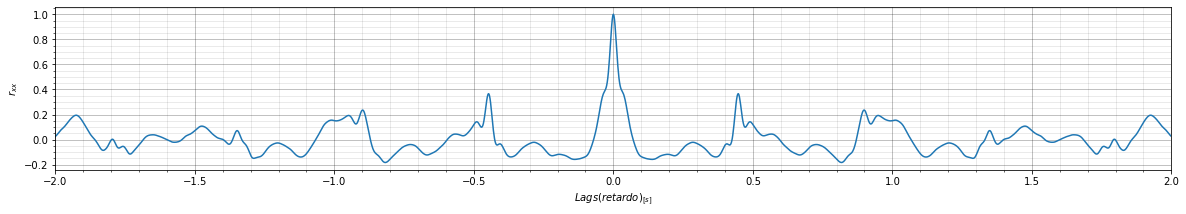

In [48]:
df=get_data(subject="s2")
df = df.loc[:,["time","ecg"]]
Ts=0.002
n=0
win_len=int(15/Ts)

x=df.loc[n:n+win_len-1,"ecg"]
rxx=get_autocorr(x)
lag_samples=(np.arange(len(rxx)) - (len(rxx)-1)/2 ) # Desplazamiento para centrar el retraso 0
lag_seconds=lag_samples*Ts
plot_signal(x=lag_seconds,y=rxx)
plt.xlim([-2,2])
plt.ylabel("$r_{xx}$")
plt.xlabel("$Lags (retardo)_{[s]}$")
plt.plot();

<h2>D) Encontrar de forma automática el período estimado de la señal </h2>
Se utiliza la librería find peaks para encontrar de forma automática los picos de la autocorrelación

In [19]:
lag_sample_peaks_sorted_by_rxx=find_lag_sample_peaks_sorted_by_rxx(rxx)

print(f"Las muestras del retraso donde se presentan los 3 picos más altos son\n\
        {lag_sample_peaks_sorted_by_rxx[:3]}-> [sample]\n\
        {lag_seconds[lag_sample_peaks_sorted_by_rxx[:3]]}->[seconds]\n\
        {rxx[lag_sample_peaks_sorted_by_rxx[:3]]}->[rxx value]\n ")

Las muestras del retraso donde se presentan los 3 picos más altos son
        [7499, 7275, 7723]-> [sample]
        [ 0.    -0.448  0.448]->[seconds]
        [1.         0.36600495 0.36600495]->[rxx value]
 


In [20]:
T_x=abs(lag_seconds[lag_sample_peaks_sorted_by_rxx[2]])
T_x

0.448

<h2>E) Convertir el dato de período en frecuencia </h2>

    Se calcula la frecuencia cardíaca como el inverso del período encontrado previamente.

In [21]:
Fppm_x=60/T_x
Fppm_x

133.92857142857142

<h2>F) Creación del pipeline para el cálculo en tiempo real </h2>
<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
    Se encapsulan todos los pasos realizados anteriormente en funciones de python, y se realiza el cálculo en tiempo real mediante el método de enventanado.
<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 

In [32]:
def get_Fppm(subject,activity):
    
    df=get_data(subject=subject,activity=activity)
    df = df.loc[:,["time","ecg"]]
    Ts=0.002
    n=0
    win_len=int(15/Ts)
    win_sol=int(3/Ts)
    n_iter= int((len(df)-win_len)*(1/win_sol)-1)
    
    t=np.arange(0,len(df)+1)*Ts
    
    Fppm_x_list=[]
    t_list=[]
    for _ in range(n_iter):
        x=df.loc[n:n+win_len-1,"ecg"]

        rxx=get_autocorr(x)

        lag_samples=(np.arange(len(rxx)) - (len(rxx)-1)/2 ) # Desplazamiento para centrar el retraso 0
        lag_seconds=lag_samples*0.002

        lag_sample_peaks_sorted_by_rxx=find_lag_sample_peaks_sorted_by_rxx(rxx)

        T_x=abs(lag_seconds[lag_sample_peaks_sorted_by_rxx[2]])


        Fppm_x=60/T_x

        Fppm_x_list.append(Fppm_x)
        t_list.append(t[n])
        n+=win_sol
        
        
    return t_list,Fppm_x_list

def main_plot_fppm(subject,activity):
    
    t,Fppm=get_Fppm(subject,activity)
    plot_signal(t,Fppm)


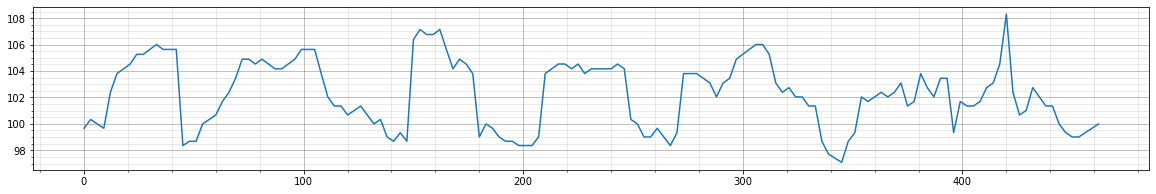

In [23]:
main_plot_fppm(subject="s10",activity="run")

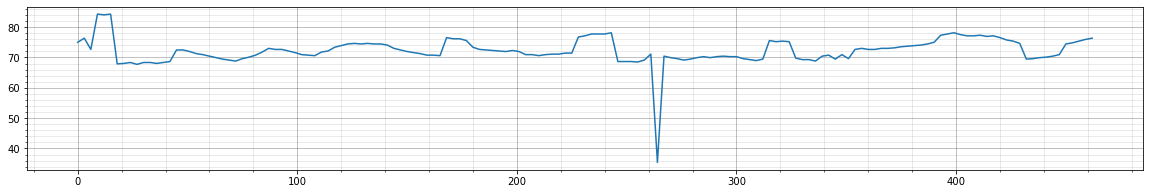

In [24]:
main_plot_fppm(subject="s12",activity="sit")


---
<p style="font-size: 30px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Discusión: Casos anómalos </p>
<br>

    Se identifican algunos casos anómalos como el sujeto 2 corriendo

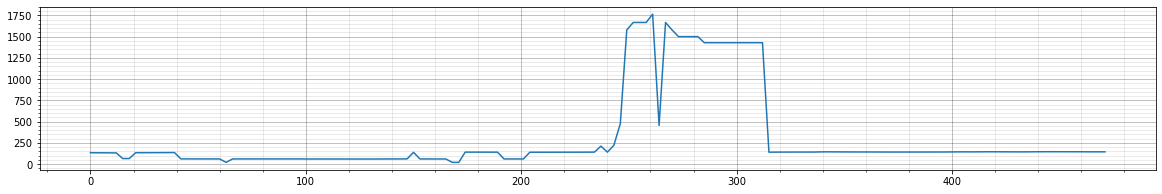

In [25]:
main_plot_fppm(subject="s2",activity="run")

    En este caso se tiene una frecuencia cardiaca excesivamente alta, esto se debe a ruido en el proceso de autocorrelación, ruido asociado a una componente de baja frecuencia en el ECG


<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
<img src="src/imgs/img1.png" width=80%>
</div>
<p style="text-align: center"></p>

    Notar que esta componente de baja frecuencia lleva a la siguiente consecuencia en el proceso de autocorrelación.

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
<img src="src/imgs/img2.png" width=80%>
</div>
<p style="text-align: center"></p>

    Este comportamiento es altamente similar al de no eliminar la componente DC de la señal. Para evitar dicho comportamiento, se implementa un filtro pasaaltos para eliminar el efecto indeseado.

    Adicionalmente, para garantizar que se tiene exclusivamente el contenido de las pulsaciones del ECG, se implementa la función de encontrar picos en la señal antes de realizar la correlación 

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
<img src="src/imgs/img3.png" width=80%>
</div>
<p style="text-align: center"></p>

    De tal forma que la señal antes de la autocorrelación es:
<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
<img src="src/imgs/img4.png" width=80%>
</div>
<p style="text-align: center"></p>

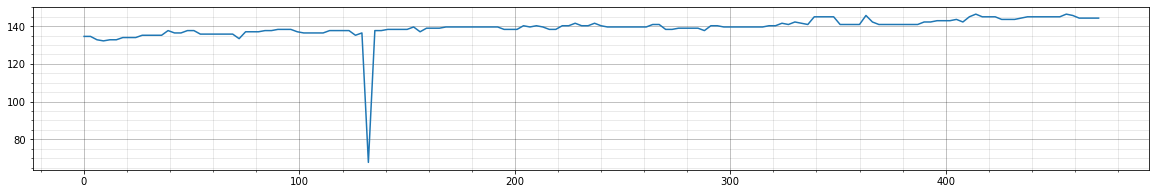

In [50]:
def get_Fppm(subject):
    
    df=get_data(subject=subject)
    df = df.loc[:,["time","ecg"]]
    Ts=0.002
    n=0
    win_len=int(15/Ts)
    win_sol=int(3/Ts)
    n_iter= int((len(df)-win_len)*(1/win_sol)-1)
    
    t=np.arange(0,len(df)+1)*Ts
    
    Fppm_x_list=[]
    t_list=[]
    for _ in range(n_iter):
        x=df.loc[n:n+win_len-1,"ecg"]
        x = butter_lowpass_filter(x, cutoff, fs, order)
        
        x=isolate_peaks(x)
        rxx=get_autocorr(x)

        lag_samples=(np.arange(len(rxx)) - (len(rxx)-1)/2 ) # Desplazamiento para centrar el retraso 0
        lag_seconds=lag_samples*0.002

        lag_sample_peaks_sorted_by_rxx=find_lag_sample_peaks_sorted_by_rxx(rxx)

        T_x=abs(lag_seconds[lag_sample_peaks_sorted_by_rxx[2]])


        Fppm_x=60/T_x

#         if Fppm_x<80:
#             print(n)
        Fppm_x_list.append(Fppm_x)
        t_list.append(t[n])
        n+=win_sol
        
        
    return t_list,Fppm_x_list

def main_plot_fppm(subject):
    
    t,Fppm=get_Fppm(subject)
    plot_signal(t,Fppm)
    
def isolate_peaks(x):

    w=(x-np.mean(x))
    w=w/np.max(w)

    peaks, _ = find_peaks(w,prominence=0.6)
    
    
    w[peaks]=100
    w=w/np.max(w)
    return w


from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    cutoff = 0.1    
    fs = 500.0
    order= 1
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

main_plot_fppm(subject="s2")

# Referencias 

<br>
<div style="text-align: justify;width:90%;margin: 0 auto"> 
   
    [1]. Mehrgardt, P., Khushi, M., Poon, S., & Withana, A. (2022). Pulse Transit Time PPG Dataset (version 1.1.0). PhysioNet. https://doi.org/10.13026/jpan-6n92. 

    [2] Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220..

    [3] Gregory R. Lee, Ralf Gommers, Filip Wasilewski, Kai Wohlfahrt, Aaron O’Leary (2019). PyWavelets: A Python package for wavelet analysis. Journal of Open Source Software, 4(36), 1237, https://doi.org/10.21105/joss.01237.
    
    [4] Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
    
    [5] Cardona Posada, J. (2022). Detección y clasificación de fallas eléctricas en sistemas de distribución de energía eléctrica mediante el uso de la transformada wavelet continua y funciones madre de soporte infinito. [online] Medellín, Colombia: Universidad Nacional de Colombia. [Acceso : 6 de mayo 2024]

    [6]T. pandas development team, pandas-dev/pandas: Pandas. Zenodo, 2020. doi: 10.5281/zenodo.3509134.
    
    [7]Stéfan van der Walt, Ed., “ Data Structures for Statistical Computing in Python ,” in Proceedings of the 9th Python in Science Conference , 2010, pp. 56–61. doi: 10.25080/Majora-92bf1922-00a .
    
    [8]P. Virtanen et al., “SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python,” Nature Methods, vol. 17, pp. 261–272, 2020, doi: 10.1038/s41592-019-0686-2.
    
    [9]J. D. Hunter, “Matplotlib: A 2D graphics environment,” Computing in Science & Engineering, vol. 9, no. 3, pp. 90–95, 2007, doi: 10.1109/MCSE.2007.55.
    
    [10]Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.

</div>